In [1]:
import os
import sys
from pathlib import Path

sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from load_data import load_data
plt.style.use('ggplot')

In [9]:
df = load_data()

In [10]:
def plot_average_daily_offenses(ax):
    num_crimes_over_time = df.resample('M', on='OCCURRED_ON_DATE')['INCIDENT_NUMBER'].count().rename('number_of_crimes')
    ax.plot(num_crimes_over_time.index, num_crimes_over_time.values)
    ax.scatter(num_crimes_over_time.index, num_crimes_over_time.values, color='black', zorder=3)
    ax.axhline(num_crimes_over_time.mean(), ls='--')
    ax.set_title(f"Offenses per month from "
                 f"{num_crimes_over_time.index.min().strftime('%B %Y')} to "
                 f"{num_crimes_over_time.index.max().strftime('%B %Y')}", 
                 fontsize=20);
    ax.set_ylabel('Offenses per month');
    return ax

In [36]:
def plot_avg_shootings_per_day(ax):
    avg_shootings_per_month = df.resample('M', on='OCCURRED_ON_DATE')['SHOOTING'].sum()
    ax.plot(avg_shootings_per_month.index, avg_shootings_per_month.values)
    ax.scatter(avg_shootings_per_month.index, avg_shootings_per_month.values, color='black', zorder=3)
    ax.axhline(avg_shootings_per_month.mean(), ls='--')
    ax.set_title(f"Daily Shootings per Month from "
                 f"{avg_shootings_per_month.index.min().strftime('%B %Y')} to "
                 f"{avg_shootings_per_month.index.max().strftime('%B %Y')}")
    ax.set_ylabel('Shootings per Month')

In [48]:
def plot_top10_groups(ax):
    crimes_per_offense = df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values(ascending=True)
    ax.barh(crimes_per_offense.index, crimes_per_offense)
    ax.set_title('Top 10 Number of offenses by Offense Types')
    ax.set_xlabel('Number of offenses');
    for patch in ax.patches:
        y = patch.get_y() + patch.get_height() / 2
        width = patch.get_width()
        ax.annotate(f"{width/1000:.1f}K", (0, y), xytext=(5, 0), textcoords='offset points', va='center', fontsize=10, color='w')
    return ax

In [38]:
def plot_heatmap(ax):
    counts = pd.crosstab(df.DAY_OF_WEEK, df.HOUR)
    im = ax.imshow(counts, cmap="YlGn")
    ax.set_xticks(np.arange(len(counts.columns)))
    ax.set_yticks(np.arange(len(counts.index)))
    ax.set_xticklabels(counts.columns, fontsize=15)
    ax.set_yticklabels(counts.index, fontsize=15)
    for i in range(len(counts.index)):
        for j in range(len(counts.columns)):
            text = ax.text(j, i, f"{counts.loc[i, j] / 1000:.1f}K", ha="center", va="center", color="black" if counts.loc[i, j] < 2500 else "w", fontsize=8)
    ax.set_xticks(np.arange(counts.shape[1] +1) - .5, minor=True)
    ax.set_yticks(np.arange(counts.shape[0] +1) - .5, minor=True)
    ax.grid(None)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.set_title('Number of Offenses by Day of Week and Hour of Day', fontsize=15)
    ax.set_xlabel('Hour of Day', fontsize=15)
    return ax

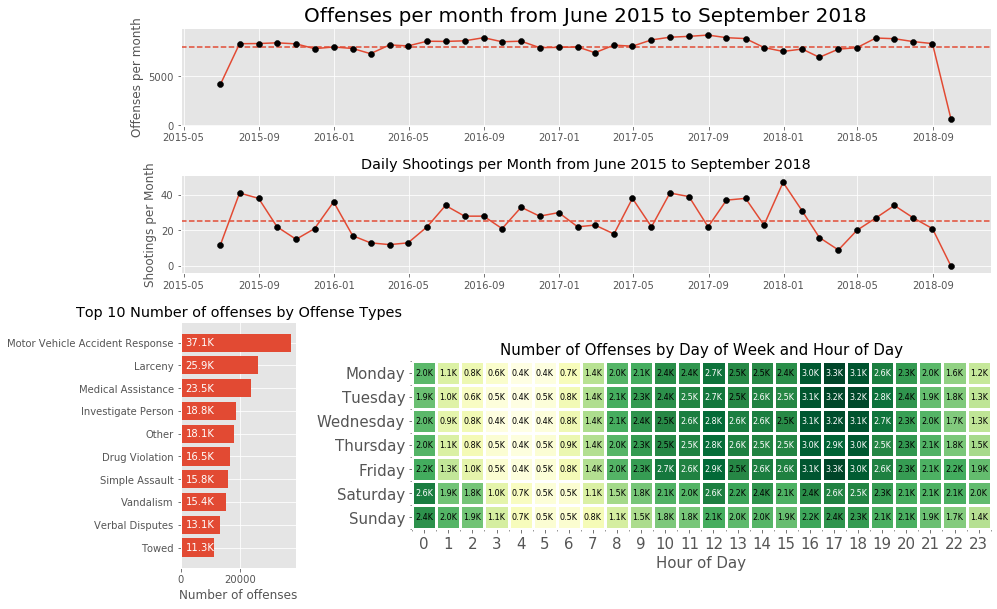

In [50]:
fig = plt.figure()

gs = fig.add_gridspec(4, 4, top=2.0, right=2.0, wspace=1, hspace=.5)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2:, :1])
ax4 = fig.add_subplot(gs[2:, 1:])

plot_average_daily_offenses(ax1)
plot_avg_shootings_per_day(ax2)
plot_top10_groups(ax3)
plot_heatmap(ax4)

fig.subplots

fig.savefig('matplotlib_dashboard.svg', bbox_inches='tight')